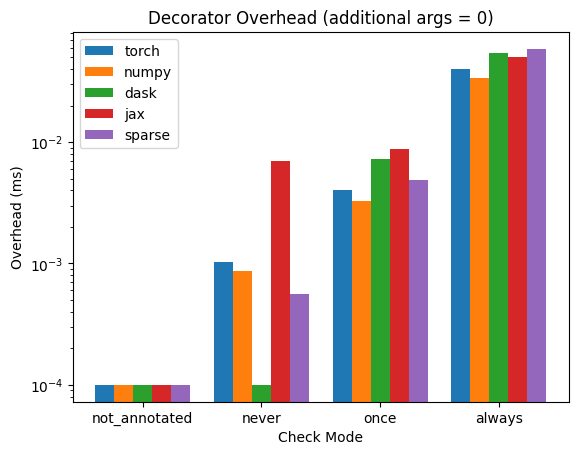

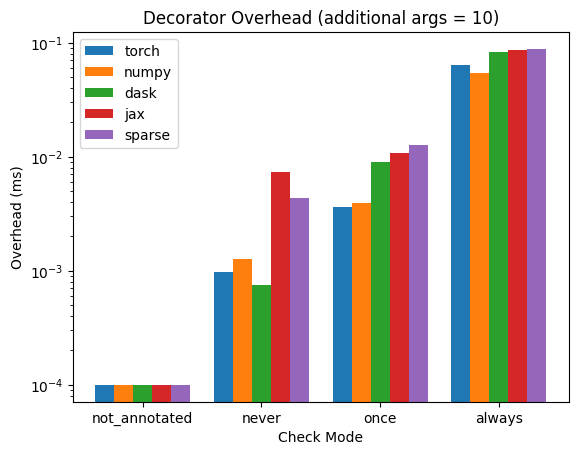

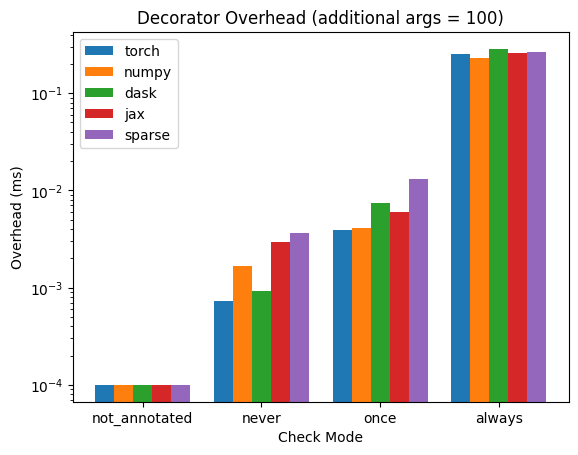

In [ ]:
import matplotlib.pyplot as plt

# read benchmark results from CSV
import pandas as pd
import numpy as np
from tabulate import tabulate

df = pd.read_csv("benchmark_results.csv")

# plot benchmark results

modes = df['check mode'].unique()
libs = df['library'].unique()
n_libs = len(libs)

# find a small positive epsilon to replace non-positive values (log scale can't handle <= 0)
pos_min = df[df['overhead (ms)'] > 0]['overhead (ms)'].min()
epsilon = 1e-4

for add_args in df['additional args'].unique():
    x = np.arange(len(modes))
    width = 0.8 / n_libs

    for i, lib in enumerate(libs):
        lib_df = df[(df['library'] == lib) & (df['additional args'] == add_args)]
        vals = lib_df.set_index('check mode').reindex(modes)['overhead (ms)']
        vals_plot = vals.copy().astype(float).where(vals > 0, epsilon)  # replace <=0 with epsilon
        plt.bar(x + i * width, vals_plot, width=width, label=lib)

    plt.xticks(x + width * (n_libs - 1) / 2, modes)
    plt.xlabel("Check Mode")
    plt.ylabel("Overhead (ms)")
    plt.yscale('log')
    plt.title(f"Decorator Overhead (additional args = {add_args})")
    plt.legend()
    plt.savefig(f"assets/benchmark_overhead_additional_args_{add_args}.png")
    plt.show()


In [41]:
df = pd.read_csv("benchmark_results.csv")
print(tabulate(df[df["additional args"] == 100], tablefmt="github", floatfmt=(None, None, None, None, ".5f", ".2%", ".1e"), headers=["id", "lib", "num_args", "method", "s/it", "rel", "overhead"])) # type: ignore

|   id | lib    |   num_args | method        |    s/it | rel     |   overhead |
|------|--------|------------|---------------|---------|---------|------------|
|    8 | torch  |        100 | not_annotated | 0.02975 | 100.00% |    0.0e+00 |
|    9 | torch  |        100 | never         | 0.03106 | 104.39% |    1.3e-06 |
|   10 | torch  |        100 | once          | 0.03391 | 113.96% |    4.2e-06 |
|   11 | torch  |        100 | always        | 0.28250 | 949.49% |    2.5e-04 |
|   20 | numpy  |        100 | not_annotated | 0.15465 | 100.00% |    0.0e+00 |
|   21 | numpy  |        100 | never         | 0.15588 | 100.79% |    1.2e-06 |
|   22 | numpy  |        100 | once          | 0.15839 | 102.42% |    3.7e-06 |
|   23 | numpy  |        100 | always        | 0.38753 | 250.59% |    2.3e-04 |
|   32 | dask   |        100 | not_annotated | 1.50759 | 100.00% |    0.0e+00 |
|   33 | dask   |        100 | never         | 1.50902 | 100.09% |    1.4e-06 |
|   34 | dask   |        100 | once     